In [9]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(janitor)
library(dplyr) 
library(ggplot2)
options(repr.matrix.max.rows = 6)
install.packages("IRdisplay")
install.packages("rmarkdown") 
library(IRdisplay)
library(rmarkdown)
library(tidymodels)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



# Loading in Datasets

In [3]:
player_link <- "https://raw.githubusercontent.com/Shervin2006/DSCI100-Project/refs/heads/main/players.csv"
session_link <- "https://raw.githubusercontent.com/Shervin2006/DSCI100-Project/refs/heads/main/sessions.csv"

# Read the CSV files into data frames
players <- read_csv(player_link)
sessions <- read_csv(session_link)

head(sessions)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


# Wrangling and Summary Values

In [4]:
player_data <- players |>
  filter(!is.na(Age) & !is.na(subscribe))

# Mean hours played relative to Experience
wrangled_player_data_hrs <- player_data |>
  group_by(experience) |>
  summarise(average_playtime_hrs = mean(played_hours, na.rm = TRUE)) |>
  arrange(desc(average_playtime_hrs)) |>
  slice_head(n = 6)
print(wrangled_player_data_hrs)

# Mean hours played relative to Gender
wrangled_player_data_gender <- player_data |>
  group_by(gender) |>
  summarise(average_playtime_hrs = mean(played_hours, na.rm = TRUE)) |>
  arrange(desc(average_playtime_hrs)) |>
  slice_head(n = 6)
print(wrangled_player_data_gender)

# Count the number of people per Gender
number_of_people_per_gender <- player_data |>
  group_by(gender) |>
  summarise(total_players = n())
print(number_of_people_per_gender)

# Mean hours played relative to Age
wrangled_player_data_age <- player_data |>
  group_by(Age) |>
  summarise(average_playtime_hrs = mean(played_hours, na.rm = TRUE)) |>
  arrange(desc(average_playtime_hrs)) |>
  slice_head(n = 6)
print(wrangled_player_data_age)

# Mean for each numeric variable: played_hours, Age, and subscription rate (using subscribe as logical)
mean_values <- player_data |>
  summarise(
    Mean_Played_Hours = mean(played_hours, na.rm = TRUE),
    Mean_Age = mean(Age, na.rm = TRUE),
    Mean_Subscription = mean(subscribe, na.rm = TRUE)  # TRUE is treated as 1, FALSE as 0
  )
print(mean_values)

# A tibble: 5 × 2
  experience average_playtime_hrs
  <chr>                     <dbl>
1 Regular                  18.7  
2 Amateur                   6.02 
3 Pro                       2.78 
4 Beginner                  1.25 
5 Veteran                   0.648
# A tibble: 6 × 2
  gender            average_playtime_hrs
  <chr>                            <dbl>
1 Non-binary                      14.9  
2 Female                          10.6  
3 Agender                          6.25 
4 Male                             4.13 
5 Prefer not to say                0.373
6 Two-Spirited                     0.08 
# A tibble: 6 × 2
  gender            total_players
  <chr>                     <int>
1 Agender                       2
2 Female                       37
3 Male                        124
4 Non-binary                   15
5 Prefer not to say            11
6 Two-Spirited                  5
# A tibble: 6 × 2
    Age average_playtime_hrs
  <dbl>                <dbl>
1    16                 50.0
2  

# Exploratory Visuals

# A tibble: 1 × 2
  Mean_Played_Hours Mean_Age
              <dbl>    <dbl>
1              5.85     20.5


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


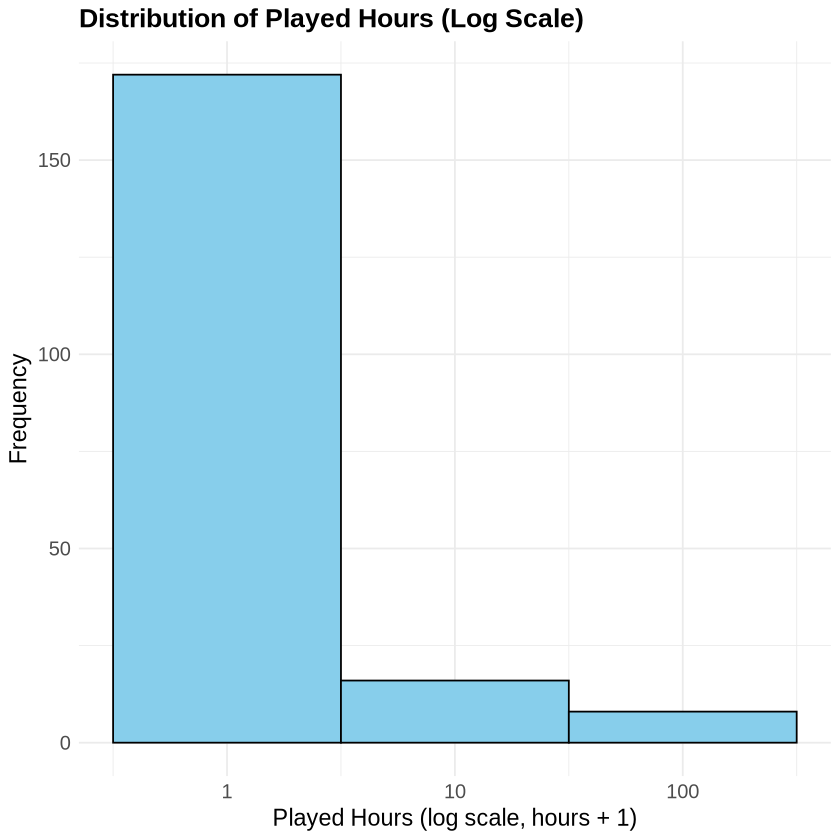

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


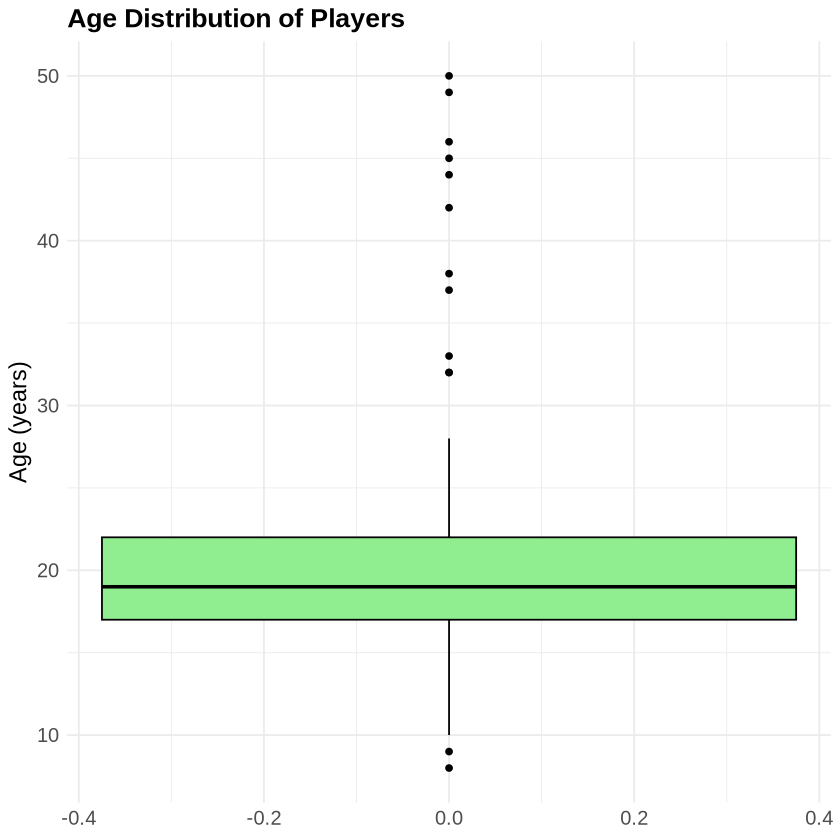

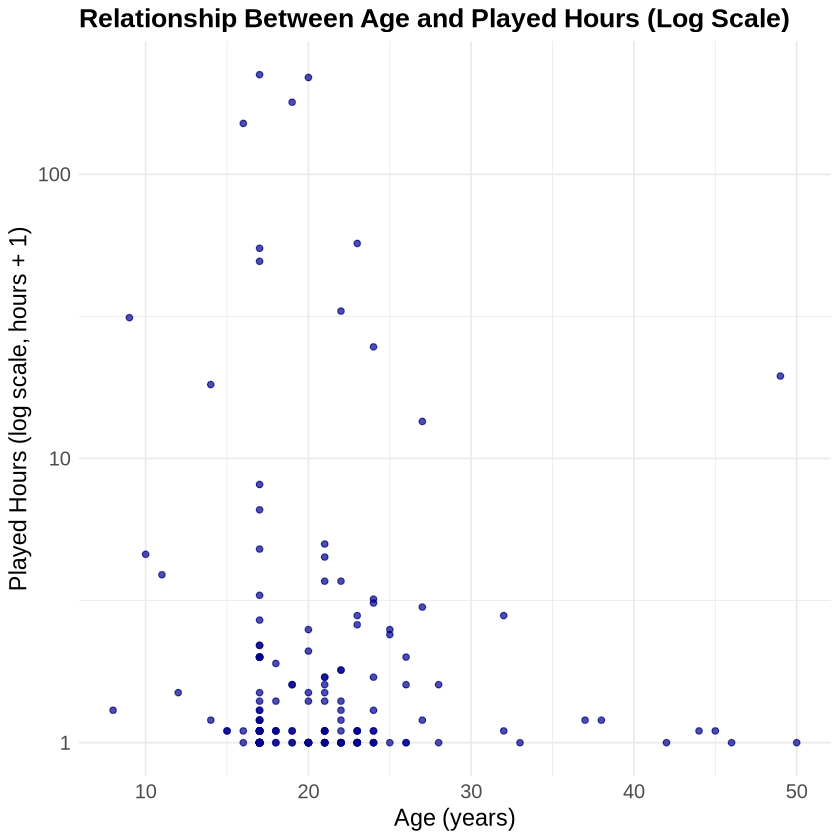

In [5]:
# Compute mean values for quantitative variables: played_hours and Age
mean_table <- players |>
  dplyr::summarise(
    Mean_Played_Hours = mean(played_hours, na.rm = TRUE),
    Mean_Age = mean(Age, na.rm = TRUE)
  )
print(mean_table)

# Create a histogram of played_hours with log scaling on the x-axis.
# We add 1 to played_hours to avoid issues with log(0).
histogram_plot <- players |>
  ggplot(aes(x = played_hours + 1)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  scale_x_log10() +
  labs(
    title = "Distribution of Played Hours (Log Scale)",
    x = "Played Hours (log scale, hours + 1)",
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )
print(histogram_plot)

# Create a boxplot for the Age distribution.
# (Age is typically not skewed enough to require log scaling, so we leave it as is.)
boxplot_age <- players |>
  ggplot(aes(y = Age)) +
  geom_boxplot(fill = "lightgreen", color = "black") +
  labs(
    title = "Age Distribution of Players",
    y = "Age (years)"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )
print(boxplot_age)

# Create a scatterplot of Age vs. Played Hours with log scaling on the y-axis.
# We add 1 to played_hours to avoid issues with log(0).
scatter_plot <- players |>
  ggplot(aes(x = Age, y = played_hours + 1)) +
  geom_point(color = "darkblue", alpha = 0.7) +
  scale_y_log10() +
  labs(
    title = "Relationship Between Age and Played Hours (Log Scale)",
    x = "Age (years)",
    y = "Played Hours (log scale, hours + 1)"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )
print(scatter_plot)

# Data Analysis

In [14]:
set.seed(1000)

player_split <- players |> initial_split(prop = 0.75, strata = played_hours)
player_training <- training(player_split)
player_testing <- testing(player_split)

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

player_recipe <- recipe(played_hours ~ experience + Age, data = player_training) |>
      step_scale(Age) |>
      step_center(Age)
player_recipe

player_vfold <- vfold_cv(player_training, v = 5, strata = played_hours)
player_workflow <- workflow() |> add_model(player_spec) |> add_recipe(player_recipe) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

player_results <- player_workflow |> tune_grid(resamples = player_vfold, grid = gridvals) |> collect_metrics()
player_results

player_min <- player_results |>
   filter(.metric == "rmse") |>
   slice_min(mean, n = 1)
player_min



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: Age

• Centering for: Age

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,23.92262515,4,6.38245874,Preprocessor1_Model01
1,rsq,standard,0.03601489,4,0.02895712,Preprocessor1_Model01
2,rmse,standard,26.68968134,4,3.44622969,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,rsq,standard,0.03324915,4,0.01656724,Preprocessor1_Model09
10,rmse,standard,23.02212405,4,5.54161890,Preprocessor1_Model10
10,rsq,standard,0.03776580,4,0.02538528,Preprocessor1_Model10


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,22.23234,4,5.270684,Preprocessor1_Model07
